# Multistep methods

## First Dahlquist barrier
Stable linear q-step multistep method cannot attain an order of convergence greater than q + 1 if q is odd and greater than q + 2 if q is even. 

If the method is also explicit, then it cannot attain an order greater than q (Hairer, Nørsett & Wanner 1993, Thm III.3.5).

## Second Dahlquist barrier
There is no explicit linear multistep method that is A-stable. 

Further, the maximal order of an (implicit) A-stable linear multistep method is 2. Among the A-stable linear multistep methods of order 2, the trapezoidal rule has the smallest error constant (Dahlquist 1963, Thm 2.1 and 2.2).

# Collocation methods
$$
 \newcommand{d}{\,{\rm d}}
 \def\vc#1{\mathbf{\boldsymbol{#1}}}     % vector
 \def\tn#1{{\mathbb{#1}}}
 \def\Real{{\rm\bf R}}
 \def\prtl{\partial}
$$


Collocation methods are based on following steps:
1. Choose the interval $(0, T)$ to solve at single step.
2. Select a space of differentiable functions on $(0,T)$ of finite dimension $d$.
   For example polynomials or splines of certain order. Use space of vector
   functions in case of ODE systems.
3. Choose particular basis of the space. Solution can be written in form:
   $$
   \vc y(t) = \sum_{i=1}^{d} y_i \phi_i(t)
   $$    
5. Apply $N$ boundary or initial conditions.
6. Select $d - N$ collocation points, apply ODE in these points.
7. Solve system of $d$ (nonlinear) equations for $d$ unknowns $y_i$.

### Problem Setup

Suppose we have the following ODE:

$$ y''(x) + y(x) = x, \quad 0 < x < 1 $$

with boundary conditions:

$$ y(0) = 0, \quad y(1) = 0 $$

This is a linear second-order ODE with boundary conditions at both ends of the interval.

### Collocation Method

1. **Approximation**: Assume an approximate solution, $y(x)$, in the form of a polynomial. For simplicity, let's choose a cubic polynomial:

   $$ y(x) = a + bx + cx^2 + dx^3 $$

   Here, $a, b, c,$ and $d$ are coefficients to be determined.

2. **Boundary Conditions**: Apply the boundary conditions to reduce the number of unknown coefficients:

   - $y(0) = a = 0$
   - $y(1) = a + b + c + d = 0$

   So, our polynomial simplifies to:

   $$ y(x) = bx + cx^2 + dx^3 $$
   $$ y(x) = 0 + bx + cx^2 + dx^3 $$

   We now have three unknowns (b, c, d) and need two more equations (since one equation comes from the boundary condition at x=1).

3. **Collocation Points**: Choose collocation points within the interval. Let's pick two points, $x_1 = \frac{1}{3}$ and $x_2 = \frac{2}{3}$.

4. **Formulate Equations**: At each collocation point, the ODE must be satisfied. Substitute $x_1$ and $x_2$ into the differential equation:

   - At $x = x_1$:

     $$ y''\left(\frac{1}{3}\right) + y\left(\frac{1}{3}\right) = \frac{1}{3} $$

   - At $x = x_2$:

     $$ y''\left(\frac{2}{3}\right) + y\left(\frac{2}{3}\right) = \frac{2}{3} $$

5. **Solve the System of Equations**: This will yield a system of equations in terms of $b, c,$ and $d$. Solve this system to find the coefficients.

### Conclusion

The solution to this system of equations will give the values of $b, c,$ and $d$, thus providing the approximate solution $y(x)$ over the interval. This example is relatively straightforward, but the collocation method can be extended to more complex problems, including nonlinear ODEs and higher-order polynomials for the approximate solution. The choice of collocation points and the form of the approximate solution can significantly impact the accuracy of the method.


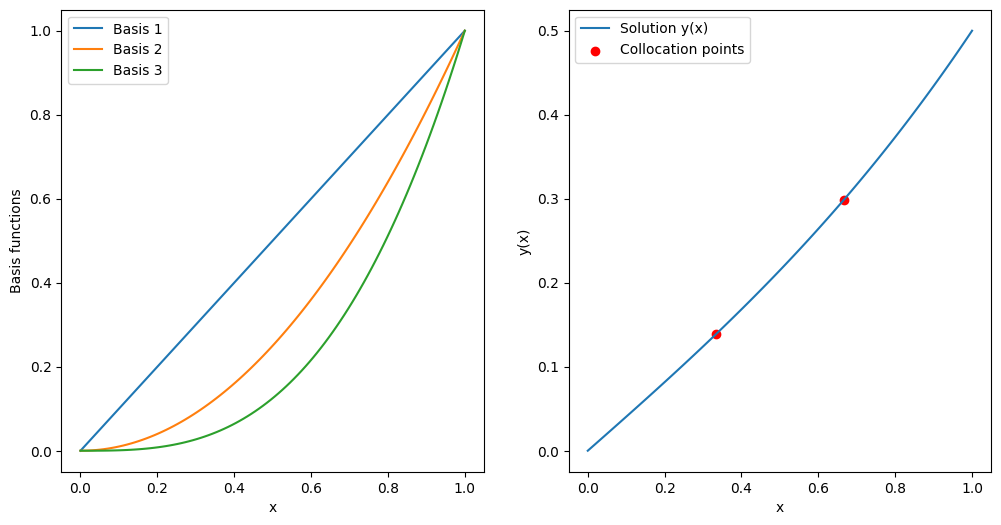

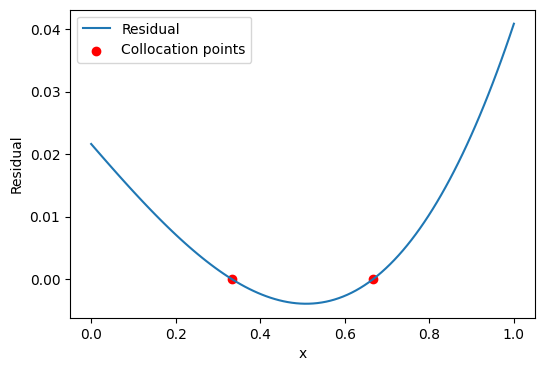

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the basis functions (cubic polynomial)
def basis_functions(x):
    return np.array([x, x**2, x**3])

# Define the derivative functions
def y_prime(x, b, c, d):
    return b + 2*c*x + 3*d*x**2

def y_double_prime(x, b, c, d):
    return 2*c + 6*d*x

# Boundary conditions
y0, y1 = 0, 0.5

# Collocation points
x1, x2 = 1/3, 2/3

# System of equations to find coefficients b, c, d
def equations(vars):
    b, c, d = vars
    y = lambda x: b*x + c*x**2 + d*x**3
    return (y_double_prime(x1, b, c, d) + y(x1) - x1, 
            y_double_prime(x2, b, c, d) + y(x2) - x2, 
            b + c + d - y1)

# Solve for coefficients
b, c, d = fsolve(equations, (0, 0, 0))

# Define the solution function
def y(x):
    return b*x + c*x**2 + d*x**3

# Define the residual function
def residual(x):
    return y_double_prime(x, b, c, d) + y(x) - x

# X values for plotting
x_values = np.linspace(0, 1, 100)

# Plot basis functions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, func in enumerate(basis_functions(x_values), 1):
    plt.plot(x_values, func, label=f'Basis {i}')
plt.xlabel('x')
plt.ylabel('Basis functions')
plt.legend()

# Plot the solution and collocation points
plt.subplot(1, 2, 2)
plt.plot(x_values, y(x_values), label='Solution y(x)')
plt.scatter([x1, x2], [y(x1), y(x2)], color='red', label='Collocation points')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()

plt.show()

# Plot the residual
plt.figure(figsize=(6, 4))
plt.plot(x_values, [residual(x) for x in x_values], label='Residual')
plt.scatter([x1, x2], [residual(x1), residual(x2)], color='red', label='Collocation points')
plt.xlabel('x')
plt.ylabel('Residual')
plt.legend()
plt.show()


# Differencial - algebraic equations